**José Enrique Zafra Mena** 


# Barajando cartas

¿Cuántas veces tenemos que barajar una baraja de cartas para tener una configuración totalmente aleatoria? ¿Hay formas más eficientes de barajar las cartas que otras? Estas, y otras preguntas de este tipo resultan interesantes, más allá de los simples juegos de cartas o para los casinos. Esto se debe, entre otros, a los problemas relacionados con la generación de números aleatorios, y configuraciones dentro de un sistema (no olvidemos que una baraja francesa, con 52 cartas tiene 52! configuraciones). Algunas respuestas a estas preguntas las podemos encontrar en algunos de los trabajos de Persi Diaconis \[1\]. 

Aunque existen teoremas matemáticos que responden a estas preguntas, podemos servirnos de un ordenador para comprobar los resultados.

\[1\] [The Best (and Worst) Ways to Shuffle Cards - Numberphile](https://www.youtube.com/watch?v=AxJubaijQbI&t=0s)

\[2\] [The Math of Card Shuffling](https://fredhohman.com/card-shuffling/)

## Creando una configuración aleatoria

Una de las formas más sencillas de obtener una configuración aleatoria de la baraja consiste en (con el mazo ordenado, sin pérdida de generalidad) tomar la carta superior de la baraja e insertarla de forma aleatoria entre las demás cartas. Repitiendo el proceso, de forma eventual la última carta (el rey de diamantes) irá subiendo, hasta llegar a ser la primera carta. Cuando tomamos esta y la colocamos de forma aleatoria entre las demás, hemos obtenido una configuración totalmente aleatoria. Con este proceso, se necesitan del orden de 236 iteraciones para finalizar el proceso. Ver \[2\] para una explicación más detallada.

La siguiente celda (que no se debe modificar) contiene la definición de dos clases de python para facilitar el trabajo, y el siguiente varios ejemplos de uso para entender mejor estas clases.

In [1]:
import matplotlib.pyplot as plt
#Importar librerias
from termcolor import colored

#Clase para la baraja de cartas
VALORES = (1,2,3,4,5,6,7,8,9,10,11,13,14) # Valores numericos posibles
PALOS = (0,1,3,2) # Palos existentes en la baraja
N = 52

# Clase que contiene la información relativa a una carta concreta de la baraja
class card:
    def __init__(self, v, p, o):        
        self.valor = v # Valor numérico de la carta
        self.palo = p  # Palo de la carta
        self.ordinal = o # Posición dentro de la baraja al crear la carta
        self.simbolo = chr(0x1f0a0 + 16*p + v) # Simbolo para la representación
    
    def show(self): #Metodo usado para representar las cartas
        colores = ["grey", "red", "red", "grey"]
        print(colored(self.simbolo,colores[self.palo]),end = '')
        
# Clase que contiene la información y creación de una baraja
class deck():
    def __init__(self):
        self.cartas = [] # Una baraja tiene una lista de cartas asociada
        self.build()     # Llenamos la lista
        
    def build(self):
        k = 0
        for i in PALOS:
            for j in VALORES:
                self.cartas.append(card(j,i,k))  # Hacemos la lista ordenada
                k += 1
                
    def show(self):  # Representación de la baraja
        n = 0
        print()
        for c in self.cartas:
            c.show()
            if n == 12:
                print()
                n = 0
            else:
                n += 1

In [2]:
carta = card(1,0,0) # Creación de una carta
carta.show() # Vemos la carta

print("\t Info. carta:",carta.valor, carta.palo, carta.ordinal)

baraja = deck() # Creamos una baraja ordenada
baraja.show()   # Mostramos la baraja

# Podemos acceder a una de las cartas de la baraja de la siguiente forma:
print("\n")
baraja.cartas[27].show()

🂡	 Info. carta: 1 0 0

🂡🂢🂣🂤🂥🂦🂧🂨🂩🂪🂫🂭🂮
🂱🂲🂳🂴🂵🂶🂷🂸🂹🂺🂻🂽🂾
🃑🃒🃓🃔🃕🃖🃗🃘🃙🃚🃛🃝🃞
🃁🃂🃃🃄🃅🃆🃇🃈🃉🃊🃋🃍🃎


🃒

In [3]:
#Librerias
import numpy as np

#Variables globales que no cambian en el documento
baraja=deck()

#Definir funciones
def carta_random(deck):
    n=np.random.randint(0,52)
    carta=deck.cartas[n]

    print("\t Info. carta:", carta.valor, carta.palo, carta.ordinal)
    deck.cartas[n].show() # qué enseña?
    return(carta)


def datos(carta):
    V=[carta.valor, carta.palo, carta.ordinal, carta.simbolo]
    return V


-----
- Crear una baraja, intercambiar dos elementos y representar la nueva baraja.

In [4]:
baraja2=deck()

C1=carta_random(baraja2)
C2=carta_random(baraja2)
print("\n")


d1=datos(C1)
d2=datos(C2)

[C1.valor, C1.palo, C1.ordinal, C1.simbolo]=d2
[C2.valor, C2.palo, C2.ordinal, C2.simbolo]=d1


baraja2.show()

	 Info. carta: 1 3 26
🃑	 Info. carta: 4 1 16
🂴


🂡🂢🂣🂤🂥🂦🂧🂨🂩🂪🂫🂭🂮
🂱🂲🂳🃑🂵🂶🂷🂸🂹🂺🂻🂽🂾
🂴🃒🃓🃔🃕🃖🃗🃘🃙🃚🃛🃝🃞
🃁🃂🃃🃄🃅🃆🃇🃈🃉🃊🃋🃍🃎


----
- Teniendo en cuenta la forma de trabajar de las listas (slicing), definir una función que tome una baraja, coja la primera carta y la inserte en un punto aleatorio del resto de la baraja. Una vez hecho esto la función debe devolver la nueva baraja.

In [5]:
def insertar1(deck):
    n=np.random.randint(1,52)                            # empezamos en 1 para no sacar la primera carta

    # guardamos los datos de la primera carta
    c0=deck.cartas[0]
    d0=datos(c0)

    # desplazamos las cartas <n hacia el origen
    deck.cartas[0:n]=deck.cartas[1:n+1]

    # ponemos la primera carta en la posición n
    deck.cartas[n]=c0

    return deck

baraja=deck()
baraja_nueva=insertar1(baraja)
baraja_nueva.show()


🂢🂣🂤🂥🂦🂧🂨🂩🂪🂫🂭🂮🂱
🂲🂳🂴🂵🂶🂡🂷🂸🂹🂺🂻🂽🂾
🃑🃒🃓🃔🃕🃖🃗🃘🃙🃚🃛🃝🃞
🃁🃂🃃🃄🃅🃆🃇🃈🃉🃊🃋🃍🃎


-----
- Definir una nueva función, que haciendo uso de la función anterior, genere una baraja nueva, realice el proceso de barajar antes explicado y devuelva: el número de iteraciones necesitadas para realizar todo el proceso, así como la baraja.

**AYUDA**: Cuando el rey de diamantes es la primera carta (Ver VALORES y PALOS para identificarlo) debemos realizar una iteración más para tener el mazo totalmente aleatorio. 

**AYUDA**: Numpy tiene el módulo `random` que contiene funciones para generar números aleatorios.

*El momento en el que realicemos una iteración después de que el rey de diamantes sea la primera carta, supondremos que está perfectamente barajada.*


In [6]:
def shuffle_perfecto(baraja):
    baraja=deck()
    # iteramos el shuffle hasta que el rey de diamantes (valor=51) está en la primera posición
    it=0
    K_dia=baraja.cartas[51]
    while baraja.cartas[0]!= K_dia:
        insertar1(baraja)
        it+=1

    # por último insertamos el rey de diamantes (que está en la primera posición)
    insertar1(baraja)
    it+=1
    return(baraja, it)
baraja1=deck()
A=shuffle_perfecto(baraja1)
A[0].show()
print("Iteraciones: ",A[1])

iterations=0
for i in range(1,53):
    iterations+=52/i
print("Teóricamentre:",iterations)


🃇🂹🃘🃃🂲🃁🂫🂦🃝🂴🂺🃙🂧
🃛🃞🂡🂻🂵🂨🂽🃂🂤🃎🃋🂭🃒
🃔🂳🂶🃈🃓🂪🂥🂷🂩🂢🃖🃕🂱
🂣🂸🃄🃉🃗🂾🃚🃍🃆🃅🂮🃊🃑
Iteraciones:  311
Teóricamentre: 235.97828543626747


------
- Definir una función que tome una baraja y calcule el coeficiente de correlación de Pearson entre la posición de las cartas en la baraja y el orden original (carta.ordinal) \[3\]. El coeficiente de correlación se puede calcular mediante la fórmula
$$\mathrm{Coef}(X,Y)=\frac{\mathrm{COV}(X,Y)}{\sqrt{\mathrm{VAR}(X)\mathrm{VAR}(Y)}}\, .$$

**Ayuda**: La covarianza puede calcularse usando la función `cov` de numpy (usar `bias=True`).

- Definir una función que tome una baraja y calcule la entropía de Shannon de la misma \[4\]. Para calcularla tomaremos la separación en el ordinal de dos cartas consecutivas $\Delta F_k = F_{k+1}-F_k$, con valores entre 1 y 51 (en caso de ser negativo sumar 52). Recorriendo las 52 cartas (la última interactúa con la primera) calcularemos la función de distribución de probabilidad de $\Delta F_k$ (histograma normalizado), llamada $p_k$. Con esto calculamos
$$Entropia = \sum_k p_k \log(p_k)$$

- Usando las tres últimas funciones realizar una cantidad suficiente de simulaciones para obtener el histograma de: el numero de iteraciones del proceso de barajar, el coeficiente de correlación, y la entropía de Shannon, estos dos últimos para una baraja totalmente aleatoria. Además, añadir el valor que hace máximo el histograma, la media y el intervalo de una $\sigma$.

\[3\] [Wikipedia](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)

\[4\] [Correlation between two Decks of cards?](https://stats.stackexchange.com/questions/78591/correlation-between-two-decks-of-cards)

In [7]:
################################################################################################ COEFICIENTE DE CORRELACIÓN DE PEARSON ################################################################################################
def ordinales(baraja):
    cartas=baraja.cartas[:]
    ordinales=[]
    for i in range(0,52):
        ord=cartas[i].ordinal
        ordinales.append(ord)
    return ordinales
A=deck()
A_s=shuffle_perfecto(A)[0]
CCP=np.corrcoef(ordinales(A),ordinales(A_s))[0,1]

print("Coeficiente de Correlación de Pearson = ", CCP)

Coeficiente de Correlación de Pearson =  -0.03910185264236319


dif_F= [0.02081665 0.03282626 0.01921537 0.00480384 0.00320256 0.03522818
 0.03442754 0.00160128 0.0376301  0.0296237  0.01841473 0.02161729
 0.04083267 0.0296237  0.00560448 0.01601281 0.03122498 0.0376301
 0.03282626 0.02882306 0.03682946 0.03522818 0.00720576 0.00240192
 0.01200961 0.01361089 0.00800641 0.00720576 0.01921537 0.0256205
 0.03282626 0.00160128 0.01761409 0.00240192 0.00960769 0.02081665
 0.00160128 0.02401922 0.03843074 0.02481986 0.00160128 0.02161729
 0.02642114 0.00480384 0.0256205  0.02802242 0.00160128 0.01361089
 0.01281025 0.04083267]
0.9999999999999999


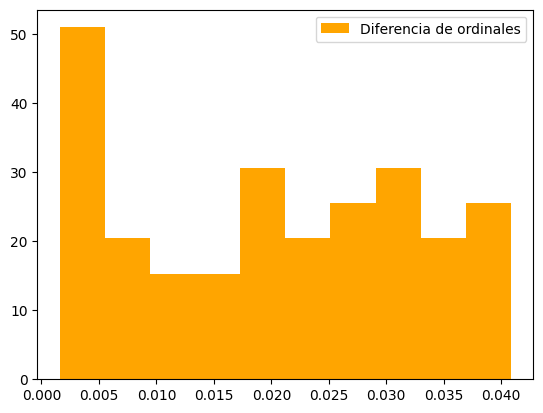

In [8]:
################################################################################################ FUNCIÓN DE DISTRIBUCIÓN DE PROBABILIDAD ################################################################################################
def rho(baraja):
    # tenemos que recorrer todas las cartas
    dif_F=[]
    for k in range(1,51):                   # dejamos fuera la primera
        F0=baraja.cartas[k].ordinal
        F1=baraja.cartas[k+1].ordinal
        F=F1-F0
        if k+1==52:
            F=baraja.cartas[0].ordinal-baraja.cartas[51].ordinal
        if F<0:
            F+=52
        dif_F.append(F)
    # ahora normalizamos para que la suma de probabilidades de uno (???)
    dif_F=np.array(dif_F)
    dif_F=dif_F/sum(dif_F)
    plt.hist(dif_F,density=True,color="orange",label="Diferencia de ordinales")
    plt.legend()
    plt.plot()
    return dif_F

test=deck()
test_barajado=shuffle_perfecto(test)[0]
F_test=rho(test_barajado)
print("dif_F=",F_test)
print(sum(F_test))

In [9]:
################################################################################################ ENTROPÍA DE SHANNON ################################################################################################
# dif_F es la diferencia de ordinales entre dos cartas consecutivas
def S_Shannon(dif_F):
    S=0
    for j in range(0,50):
        S+=-dif_F[j]*np.log(dif_F[j])
    return S
Shannon=S_Shannon(F_test)
print(Shannon)

3.6765430956755782


## Eficiencia para barajar :

A partir de la información obtenida por el coeficiente de correlación y la entropía podemos plantearnos la eficiencia de otros procesos para barajar.

- Definir una función que tome una baraja y simule el proceso de barajar las cartas conocido como *riffle shuffling*. 

**Ayuda**: para simularlo considerar que partimos las baraja más o menos por la mitad y se van tomando cartas de forma aleatoria de una o la otra mitad para volver a juntar la baraja.


- Usando la función anterior se puede, calcular la entropía y el coeficiente de correlación (con su error) como función del número de veces que barajamos. Representar los resultados y obtener cuantas veces debemos barajar con este método para obtener una baraja totalmente aleatoria.

In [10]:
import random

def riffle_shuffling(baraja):
    R1=random.sample(range(0,26),26)
    R2=random.sample(range(26,52),26)
    for i in range(26):
        # guardamos los datos de las cartas en la posición R1
        Carta=baraja.cartas[R1[i]]
        # desplazamos cada carta en la posición R2[i] hacia el origen:
        baraja.cartas[R1[i]:R2[i]]=baraja.cartas[R1[i]+1:R2[i]+1]
        # ponemos las cartas en R1 en la posición R2
        baraja.cartas[R2[i]]=Carta
    return baraja

A=deck()
B=riffle_shuffling(A)
B.show()


🂣🂦🂧🂳🂵🂶🂷🂹🂾🃒🃔🂫🃗
🃘🃙🃚🂥🃛🂴🃂🂻🂱🃃🂡🃑🃄
🃕🃅🂢🂸🃞🃆🂭🃇🃁🃈🂪🃖🃉
🃊🂮🂤🂲🃓🂺🃋🂩🃍🂽🃎🃝🂨


In [11]:
# vuelvo a definir la función que me da la función de distribución de probabilidad pero sin plotear nada:
def rho_sinplot(baraja):
    # tenemos que recorrer todas las cartas
    dif_F=[]
    for k in range(1,51):                   # dejamos fuera la primera
        F0=baraja.cartas[k].ordinal
        F1=baraja.cartas[k+1].ordinal
        F=F1-F0
        if k+1==52:
            F=baraja.cartas[0].ordinal-baraja.cartas[51].ordinal
        if F<0:
            F+=52
        dif_F.append(F)
    # ahora normalizamos para que la suma de probabilidades de uno (???)
    dif_F=np.array(dif_F)
    dif_F=dif_F/sum(dif_F)
    return dif_F

Completamente barajada a partir de la iteración  5 [S >  3.75 ]


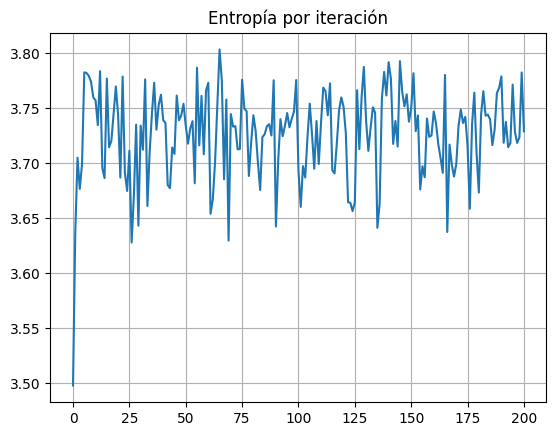

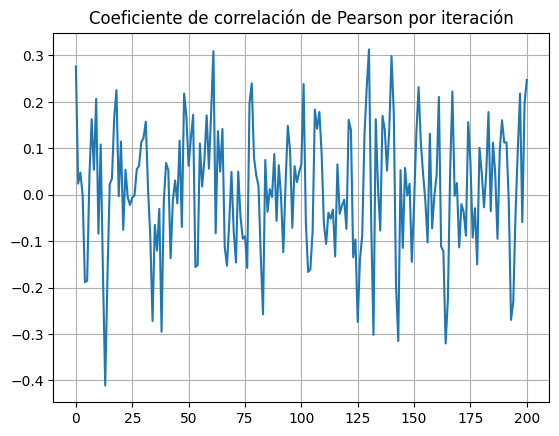

In [35]:
def eficiencia(iteraciones,tol):
    # tras hacer el RS hallar la entropía y el CCP para cada iteración
    it=range(iteraciones+1)
    A=deck()
    baraja=deck()
    correlacion=[]
    shannon=[]
    barajado=[]
    for i in it:
        # hacemos el riffle shuffling
        baraja=riffle_shuffling(baraja)
        # hallamos su entropía de Shannon
        dif_F=rho_sinplot(baraja)
        S=S_Shannon(dif_F)
        shannon.append(S)
        # hallamos su coeficiente de correlación de Pearson
        CCP=np.corrcoef(ordinales(A),ordinales(baraja))[0,1]
        correlacion.append(CCP)

        if shannon[i]>tol:
            barajado.append(i)
    print("Completamente barajada a partir de la iteración ",barajado[0], "[S > ",tol,"]")
    plt.plot(it,shannon)
    plt.title("Entropía por iteración")
    plt.grid()
    plt.show()
    plt.plot(it,correlacion)
    plt.title("Coeficiente de correlación de Pearson por iteración")
    plt.grid()
    plt.show()
    return barajado[0]

ef=eficiencia(200,3.75)

De media se necesitan 6.712 iteraciones.


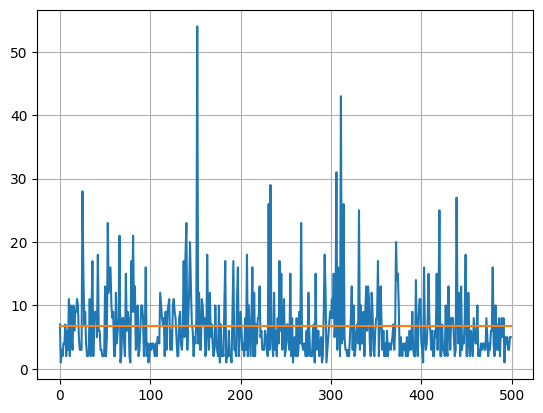

In [33]:
# ahora miramos la media de veces que hay que barajar
def eficiencia_sinplots(iteraciones,tol):
    # tras hacer el RS hallar la entropía y el CCP para cada iteración
    it=range(iteraciones+1)
    A=deck()
    baraja=deck()
    correlacion=[]
    shannon=[]
    barajado=[]
    for i in it:
        # hacemos el riffle shuffling
        baraja=riffle_shuffling(baraja)
        # hallamos su entropía de Shannon
        dif_F=rho_sinplot(baraja)
        S=S_Shannon(dif_F)
        shannon.append(S)
        # hallamos su coeficiente de correlación de Pearson
        CCP=np.corrcoef(ordinales(A),ordinales(baraja))[0,1]
        correlacion.append(CCP)

        if shannon[i]>tol:
            barajado.append(i)
    return barajado[0]

E=[]
n=500                                   # SI SALTA EL ERROR IndexError: list index out of range, es que en las n iteraciones hay alguna que no llega barajarse según nuestro criterio (compilar otra vez o aumentar n)
for i in range(n):
    E.append(eficiencia_sinplots(500,3.76))
media=sum(E)/n
print("De media se necesitan",(media),"iteraciones.")
plt.plot(range(n),E)
plt.plot(range(n),media*np.ones(n))
plt.grid()
plt.show()

**Extra**: Repetir este proceso para el primer sistema de barajar y comprobar si la entropía y el coeficiente de correlación pueden salvarnos de tener que "barajar" tantas veces para tener una baraja aleatoria

De media se necesitan 119.36 iteraciones.
Por lo tanto no necesitamos hacer este método tantas veces como antes vimos, que eran algo más de 200.


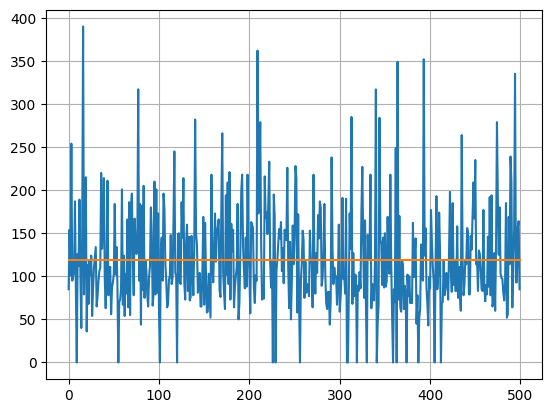

In [38]:
 # hacemos lo mismo para lo que hemos definido al principio como shuffle_perfecto:

def eficiencia2(iteraciones,tol):
    # tras hacer el RS hallar la entropía y el CCP para cada iteración
    it=range(iteraciones+1)
    A=deck()
    baraja=deck()
    correlacion=[]
    shannon=[]
    barajado=[]
    for i in it:
        # hacemos el "shuffle perfecto"
        baraja=insertar1(baraja)
        # hallamos su entropía de Shannon
        dif_F=rho_sinplot(baraja)
        S=S_Shannon(dif_F)
        shannon.append(S)
        # hallamos su coeficiente de correlación de Pearson
        CCP=np.corrcoef(ordinales(A),ordinales(baraja))[0,1]
        correlacion.append(CCP)

        if shannon[i]>tol:
            barajado.append(i)
    return barajado[0]

E2=[]
n=500                                   # SI SALTA EL ERROR IndexError: list index out of range, es que en las n iteraciones hay alguna que no llega barajarse según nuestro criterio (compilar otra vez o aumentar n)
for i in range(n):
    E2.append(eficiencia2(500,3.76))
media=sum(E2)/n
print("De media se necesitan",(media),"iteraciones.")
print("Por lo tanto no necesitamos hacer este método tantas veces como antes vimos, que eran algo más de 200.")
plt.plot(range(n),E2)
plt.plot(range(n),media*np.ones(n))
plt.grid()
plt.show()